# This notebook is used to reproduce the example given in https://arxiv.org/pdf/1601.07913v1 and used to validate the conditional DNN in axriv:xxx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LeakyReLU, LSTM, Conv1D, SimpleRNN, Concatenate
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm

In [2]:
s1 = np.random.normal(-2, 0.25, 50000)
s2 = np.random.normal(-1, 0.25, 50000)
s3 = np.random.normal(0, 0.25, 50000)
s4 = np.random.normal(1, 0.25, 50000)
s5 = np.random.normal(2, 0.25, 50000)


In [3]:
sig1 = np.vstack((s1,np.ones(len(s1))*-2))
sig2 = np.vstack((s2,np.ones(len(s2))*-1))
sig3 = np.vstack((s3,np.ones(len(s3))*0))
sig4 = np.vstack((s4,np.ones(len(s4))*1))
sig5 = np.vstack((s5,np.ones(len(s5))*2))

sig = np.hstack((sig1,sig2,sig3,sig4,sig5)).T
bkg=  np.vstack((np.random.uniform(-4,4,int(sig.shape[0]/4)),np.random.uniform(-4,4,int(sig.shape[0]/4)))).T


In [4]:
sig.shape,bkg.shape

((250000, 2), (62500, 2))

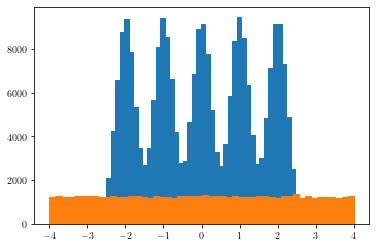

In [5]:
plt.hist(sig[:,0],bins=50,histtype='step',fill=True);
plt.hist(bkg[:,0],bins=50,histtype='step',fill=True);

In [6]:
sig.shape,bkg.shape

((250000, 2), (62500, 2))

In [7]:
x_data = np.concatenate((sig,bkg))
y_data = np.concatenate((np.ones(sig.shape[0]),np.zeros(bkg.shape[0])))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=True)
     

In [9]:
print('train sample shape= ',X_train.shape,' and test sample shape= ',X_test.shape)
print('train label shape= ',y_train.shape,'\t and test label shape= ',y_test.shape)

train sample shape=  (250000, 2)  and test sample shape=  (62500, 2)
train label shape=  (250000,) 	 and test label shape=  (62500,)


In [10]:
inputA = keras.layers.Input(shape=(1,))
x = keras.layers.Dense(300,activation='relu')(inputA)
x = keras.layers.Dense(300,activation='relu') (x)
x = keras.layers.Dense(100,activation='relu') (x)

inputB = keras.layers.Input(shape=(1,))
y = keras.layers.Dense(100)(inputB)

combined = keras.layers.concatenate([x, y])
out = keras.layers.Dense(64,activation='tanh') (combined)
#out = keras.layers.Dense(32,activation='tanh') (out)
output = keras.layers.Dense(1,activation='sigmoid')(out)

model = Model([inputA,inputB],output)

2024-05-22 20:03:42.763624: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-05-22 20:03:42.763656: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-22 20:03:42.763667: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-22 20:03:42.763712: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-22 20:03:42.763735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 300)                  600       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 300)                  90300     ['dense[0][0]']               
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                              

In [12]:
#model = keras.Sequential([ 
#keras.layers.Dense(300,input_dim=2,activation='relu'),
#keras.layers.Dense(300,activation='relu'),
#keras.layers.Dense(100,activation='relu'),     
#keras.layers.Dropout(0.2),
#keras.layers.Dense(1,activation='sigmoid') #Only one neuron while we have binary problem( Signal events or not)
#])
#model.summary()

In [13]:
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='mse',metrics=['accuracy'])


In [14]:
history = model.fit([X_train[:,0],X_train[:,1]],y_train,epochs=5,batch_size=500,validation_split=0.2)

Epoch 1/5


2024-05-22 20:03:43.351117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


396/400 [============================>.] - ETA: 0s - loss: 0.1612 - accuracy: 0.8024

2024-05-22 20:03:46.272842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 3s 6ms/step - loss: 0.1607 - accuracy: 0.8025 - val_loss: 0.1120 - val_accuracy: 0.8122
Epoch 2/5
400/400 [==============================] - 2s 5ms/step - loss: 0.1002 - accuracy: 0.8428 - val_loss: 0.0838 - val_accuracy: 0.9035
Epoch 3/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9359 - val_loss: 0.0471 - val_accuracy: 0.9515
Epoch 4/5
400/400 [==============================] - 2s 6ms/step - loss: 0.0416 - accuracy: 0.9550 - val_loss: 0.0408 - val_accuracy: 0.9553
Epoch 5/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9581 - val_loss: 0.0369 - val_accuracy: 0.9566


In [15]:
x1_new =X_test[:,0][y_test==1]
x2_new =X_test[:,1][y_test==1]

In [16]:
y = model.predict([x1_new,x2_new]);


  94/1566 [>.............................] - ETA: 2s

2024-05-22 20:03:55.159347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1566/1566 [==============================] - 2s 2ms/step


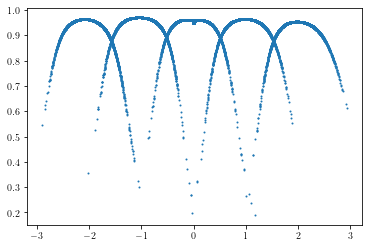

In [17]:
plt.scatter(X_test[:,0][y_test==1],y,s=1);

In [18]:
t1 = np.random.normal(-0.5, 0.25, 5000).T
st1 = np.vstack((t1,np.ones(len(t1))*-0.5)).T

t2 = np.random.normal(0.5, 0.25, 5000).T
st2 = np.vstack((t2,np.ones(len(t2))*0.5)).T

In [19]:
y1 = model.predict([st1[:,0],st1[:,1]]);
y2 = model.predict([st2[:,0],st2[:,1]]);

157/157 [==============================] - 0s 2ms/step


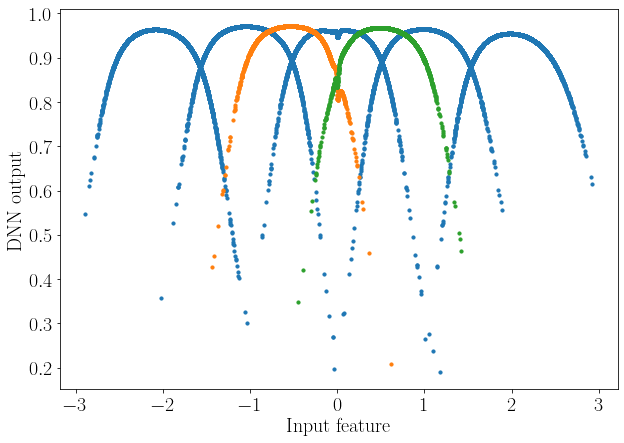

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X_test[:,0][y_test==1],y,s=10);
plt.scatter(st1[:,0],y1,s=10);
plt.scatter(st2[:,0],y2,s=10);
plt.xlabel('Input feature', fontsize=20);
plt.ylabel('DNN output', fontsize=20);
plt.tick_params('both', labelsize=20);

In [21]:
model.evaluate([X_test[:,0],X_test[:,1]],y_test)

  29/1954 [..............................] - ETA: 7s - loss: 0.0396 - accuracy: 0.9558

2024-05-22 20:03:59.175879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1954/1954 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9587


[0.03568816930055618, 0.958736002445221]

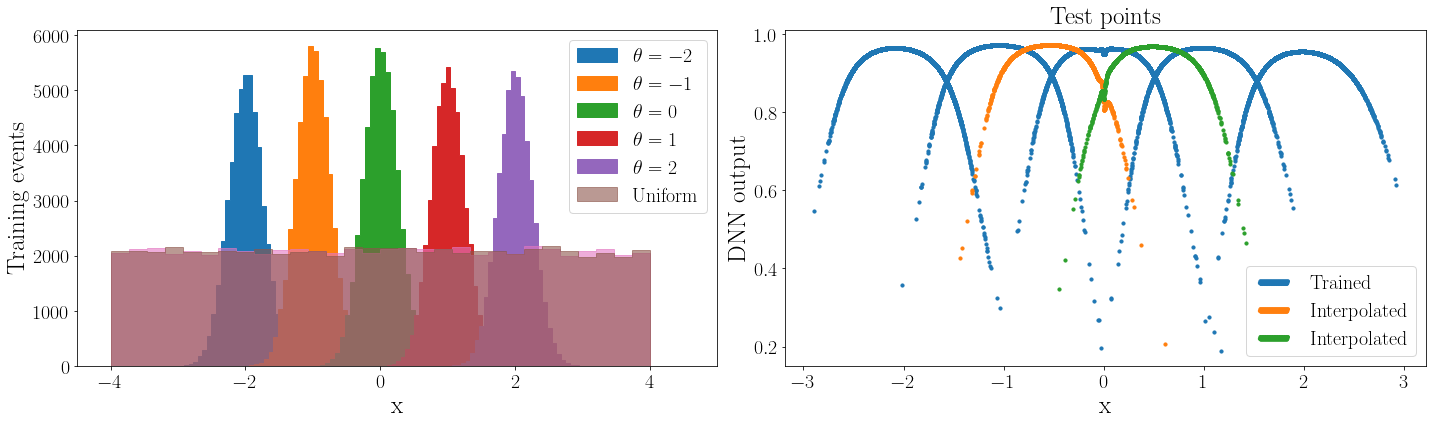

In [22]:
fig = plt.figure(figsize=(20,6))

yl1 = fig.add_subplot(121)
yl1.hist(s1,bins= 30,fill=True,histtype='step',label=r'$\theta=-2$');
yl1.hist(s2,bins= 30,fill=True,histtype='step',label=r'$\theta=-1$');
yl1.hist(s3,bins= 30,fill=True,histtype='step',label=r'$\theta=0$');
yl1.hist(s4,bins= 30,fill=True,histtype='step',label=r'$\theta=1$');
yl1.hist(s5,bins= 30,fill=True,histtype='step',label=r'$\theta=2$');
yl1.hist(bkg,bins= 30,fill=True,histtype='step',alpha=0.6,label=r'Uniform');
yl1.legend(fontsize=20,frameon=True);
yl1.set_xlabel('x',fontsize=25);
yl1.set_ylabel('Training events',fontsize=25);
plt.tick_params('both',labelsize=20);
plt.xlim(-4.5,5);

yl = fig.add_subplot(122)
yl.scatter(X_test[:,0][y_test==1],y,s=10,label = 'Trained');
yl.scatter(st1[:,0],y1,s=10,label = 'Interpolated');
yl.scatter(st2[:,0],y2,s=10,label = 'Interpolated');
yl.set_xlabel(r'x', fontsize=25);
yl.set_ylabel('DNN output', fontsize=25);
yl.tick_params('both', labelsize=20);
yl.legend(fontsize=20,frameon=True,scatterpoints=50);
yl.set_title("Test points",fontsize=25)

plt.tight_layout()


plt.savefig('/Users/hammad/work/tth/Toy.pdf')